# Task 1. Time-series prediction with neural networks


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Prediction with synthetic series using MLP, RNN, and LSTM


### A. Dataset and Task:





In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

def reshape(data, input_len, output_len):
  input_v = []
  output_v = []
  for i in range(len(data) - input_len):
    iv = data[i:i+input_len]
    ov = data[i+input_len:i+input_len]
    input_v.append(iv)
    output_v.append(ov)
  train_i = np.array(input_v)
  train_o = np.array(output_v)
  return train_i, train_o

def reshape2(data, input_len, output_len):
  input_v = []
  output_v = []
  for i in range(len(data) - input_len-1):
    iv = data[i:i+input_len]
    ov = data[i+input_len:i+input_len+output_len]
    input_v.append(iv)
    output_v.append(ov)
  #output_v = output_v[:-1]
  train_i = np.array(input_v)
  train_o = np.array(output_v)
  return train_i, train_o

def data_splitting(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
  return X_train, X_test, y_train, y_test

1. An equal-difference series starting from 0, ending to 1 (excluding 1), with a length of 200 points (step = 0.005). Design an MLP for one-step prediction. The output vector has a size of 1. Let the input vector be a size of 4.

In [ ]:
series = np.arange(0, 1, 0.005)

# Create input and output vectors
input_v = np.empty((196, 4))
output_v = np.empty(196)
input_v, output_v = reshape(series, 4, 1)

# Split training and test sets (fake)
X_train, X_test, y_train, y_test = data_splitting(input_v, output_v)

# Create real test sets 
input_2 = []
output_2 = []
input_2.append(series[-4:])
test_i = np.array(input_2)
test_o = np.array(output_2)

# Define and train the MLP model
model = MLPRegressor(hidden_layer_sizes=(10,), activation='identity', solver='adam')
model.fit(X_train, y_train)

# Evaluate the model
train_predictions = model.predict(X_test)
test_predictions = model.predict(test_i)

mse1 = np.mean((train_predictions - y_test) ** 2)
mape1 = np.mean(np.abs((train_predictions - y_test) / y_test)) * 100

mse2 = np.mean((test_predictions - 1) ** 2)
mape2 = np.mean(np.abs((test_predictions - 1) / 1)) * 100

print("In-sample MSE:", mse1)
print("In-sample MAPE:", mape1)

print("Test predictions:", test_predictions)
print("Out-of-sample MSE:", mse2)
print("Out-of-sample MAPE:", mape2)

In-sample MSE: 0.018896302509905174
In-sample MAPE: 15.066697519627246
Test predictions: [1.17188821]
Out-of-sample MSE: 0.029545557523121015
Out-of-sample MAPE: 17.18882122867098


2. An equal-difference series starting from 0, ending to 1, with a length of 200 points (step = 0.005), plus white noise i.e., random variable with zero mean and 1 variance. You may need to control the amplitude of the noise series in order to control the signal-noise ratio. Design an MLP for one-step prediction. The output vector has a size of 1. Let the input vector be a size of 4.

In [ ]:
series = np.arange(0, 1, 0.005)
noise = np.random.normal(0, 1, 201)*0.05

series = series + noise[:-1]

# Create input and output vectors
input_v = np.empty((196, 4))
output_v = np.empty(196)
input_v, output_v = reshape(series, 4, 1)

# Split training and test sets (fake)
X_train, X_test, y_train, y_test = data_splitting(input_v, output_v)

# Create real test sets 
X = []
y = []
X.append(series[-4:])
y.append(noise[-1:]+1)
rtest_X = np.array(X)
rtest_y = np.array(y)

# Define and train the MLP model
model = MLPRegressor(hidden_layer_sizes=(10,), max_iter = 50000, activation='tanh', solver='adam')
model.fit(X_train, y_train)

# Evaluate the model
train_predictions = model.predict(X_test)
test_predictions = model.predict(rtest_X)

mse1 = np.mean((train_predictions - y_test) ** 2)
mape1 = np.mean(np.abs((train_predictions - y_test) / y_test)) * 100

mse2 = np.mean((test_predictions - 1) ** 2)
mape2 = np.mean(np.abs((test_predictions - rtest_y) / rtest_y)) * 100

print("In-sample MSE:", mse1)
print("In-sample MAPE:", mape1)

print("Test predictions:", test_predictions)
print("Out-of-sample MSE:", mse2)
print("Out-of-sample MAPE:", mape2)

In-sample MSE: 0.01955817954313812
In-sample MAPE: 13.418911912181597
Test predictions: [1.12029678]
Out-of-sample MSE: 0.014471314871809297
Out-of-sample MAPE: 10.321739226345898


/Users/aoniyikou/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3. A deterministic series sampled from a sinusoidal wave with period 20 seconds, with a sample rate of 100 Hz. Generate sufficient samples (at least 3 periods of data) as needed to achieve good performance, e.g. MSE (mean squared error) below 0.5. Design an RNN and a LSTM for two-step prediction. The output vector has a size of 2. Set the input vector size by yourself.

In [ ]:
input_len = 10
output_len = 2

#Generate a signal including y value of real test set
rsignal = 1 * np.sin(2 * np.pi * 1/20 * np.arange(int(20*100*3)+output_len) / 100)
signal = rsignal[:-output_len]

# Create input and output vectors
input_v = np.empty((len(signal)-input_len, input_len))
output_v = np.empty(len(signal)-input_len)
input_v, output_v = reshape2(signal, input_len, output_len)

# Split training and test sets (fake)
X_train, X_test, y_train, y_test = data_splitting(input_v, output_v)


# Create real test sets 
X = []
y = []
for i in range(len(signal)-input_len-1, len(signal)-input_len+1):
    iv = signal[i:i+input_len]
    ov = rsignal[i+input_len:i+input_len+2]
    X.append(iv)
    y.append(ov)
X_pred = np.array(X)
y_pred = np.array(y)

    
# RNN
rnn_model = Sequential()
rnn_model.add(layers.SimpleRNN(128, activation='relu', input_shape=(input_len, 1)))
rnn_model.add(layers.Dense(output_len))

# RNN compilation
rnn_model.compile(loss='mse', optimizer='adam')

# RNN Training
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(128, activation='relu', input_shape=(input_len, 1)))
lstm_model.add(Dense(output_len))

# LSTM compilation
lstm_model.compile(optimizer='adam', loss='mse')

# LSTM Training
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Model Evaluation
rnn_loss = rnn_model.evaluate(X_test, y_test)
lstm_loss = lstm_model.evaluate(X_test, y_test)
print("RNN in-sample loss(MSE):", rnn_loss)
print("LSTM in-sample loss(MSE):", lstm_loss)

# Prediction
rnn_predictions = rnn_model.predict(X_pred)
lstm_predictions = lstm_model.predict(X_pred)

print("RNN Predictions:", rnn_predictions)
print("LSTM Predictions:", lstm_predictions)
print("REAL VALUE:", rsignal[-3:-1], rsignal[-2:])
mse1 = np.mean((rnn_predictions - rsignal[-2:]) ** 2)
mse2 = np.mean((lstm_predictions - rsignal[-2:]) ** 2)

print("RNN out-of-sample loss(MSE):", mse1)
print("LSTM out-of-sample loss(MSE):", mse2)

38/38 [==============================] - 0s 2ms/step - loss: 2.5891e-04
RNN in-sample loss(MSE): 1.454757421015529e-05
LSTM in-sample loss(MSE): 0.0002589113137219101
1/1 [==============================] - 0s 73ms/step
RNN Predictions: [[-0.00414439 -0.00485487]
 [-0.00135436 -0.00204125]]
LSTM Predictions: [[-0.0123568  -0.01144732]
 [-0.00919584 -0.00831707]]
REAL VALUE: [-3.14158749e-03 -7.34788079e-16] [-7.34788079e-16  3.14158749e-03]
RNN out-of-sample loss(MSE): 2.7453846682333158e-05
LSTM out-of-sample loss(MSE): 0.00014534772236740793


4. A stochastic series sampled from a sinusoidal wave with period 20 seconds, with a sample rate of 100 Hz, plus random white noise i.e., random variable with zero mean and 1 variance. Control the amplitude of the noise with a fractional number, e.g. 0.1. Design an RNN and a LSTM for two-step prediction. The output vector has a size of 2. Set the input vector size by yourself.

In [ ]:
input_len = 10
output_len = 2
A_noise = 0.1
# Generate the sinusoidal wave
rsignal = 1 * np.sin(2 * np.pi * 1/20 * np.arange(int(20*100*3)+output_len) / 100)

# Generate random white noise
noise = np.random.normal(0, 1, len(rsignal))

# Add the sinusoidal wave and the random noise
signal = rsignal[:-output_len] + A_noise * noise[:-output_len]

# Create input and output vectors
input_v = np.empty((len(signal)-input_len, input_len))
output_v = np.empty(len(signal)-input_len)
input_v, output_v = reshape2(signal, input_len, output_len)

# Split training and test sets (fake)
X_train, X_test, y_train, y_test = data_splitting(input_v, output_v)


# Create real test sets 
X = []
y = []
for i in range(len(signal)-input_len-1, len(signal)-input_len+1):
    iv = signal[i:i+input_len]
    ov = rsignal[i+input_len:i+input_len+2]
    X.append(iv)
    y.append(ov)
X_pred = np.array(X)
y_pred = np.array(y)

    
# RNN
rnn_model = Sequential()
rnn_model.add(layers.SimpleRNN(128, activation='relu', input_shape=(input_len, 1)))
rnn_model.add(layers.Dense(output_len))

# RNN compilation
rnn_model.compile(loss='mse', optimizer='adam')

# RNN Training
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(128, activation='relu', input_shape=(input_len, 1)))
lstm_model.add(Dense(output_len))

# LSTM compilation
lstm_model.compile(optimizer='adam', loss='mse')

# LSTM Training
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Model Evaluation
rnn_loss = rnn_model.evaluate(X_test, y_test)
lstm_loss = lstm_model.evaluate(X_test, y_test)
print("RNN in-sample loss(MSE):", rnn_loss)
print("LSTM in-sample loss(MSE):", lstm_loss)

# Prediction
rnn_predictions = rnn_model.predict(X_pred)
lstm_predictions = lstm_model.predict(X_pred)

print("RNN Predictions:", rnn_predictions)
print("LSTM Predictions:", lstm_predictions)
print("REAL VALUE:", rsignal[-3:-1], rsignal[-2:])
mse1 = np.mean((rnn_predictions - rsignal[-2:]) ** 2)
mse2 = np.mean((lstm_predictions - rsignal[-2:]) ** 2)

print("RNN out-of-sample loss(MSE):", mse1)
print("LSTM out-of-sample loss(MSE):", mse2)

38/38 [==============================] - 0s 2ms/step - loss: 0.0119
RNN in-sample loss(MSE): 0.0122745456174016
LSTM in-sample loss(MSE): 0.011865579523146152
1/1 [==============================] - 0s 76ms/step
RNN Predictions: [[-0.04253362 -0.03175256]
 [-0.06199889 -0.06136368]]
LSTM Predictions: [[-0.02584287 -0.02230762]
 [-0.03163369 -0.02769754]]
REAL VALUE: [-3.14158749e-03 -7.34788079e-16] [-7.34788079e-16  3.14158749e-03]
RNN out-of-sample loss(MSE): 0.0027578754423827536
LSTM out-of-sample loss(MSE): 0.0008168145368002259


## 1.2 Predict white noise, random walk, an ARMA process using neural networks

We use three synthetic data sets, each with 1000 data points.
1. A pure white-noise signal.
2. A random-walk series.
3. A stationary series generated by an ARMA(2, 2) process. Make sure that the process
with right parameters generates a stationary series.

Your task is to design and test an neural network to build a prediction model
for the three series, ie., white noise, random-walk, and ARMA(2, 2) process.

In [ ]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from tensorflow import keras
from tensorflow.keras import layers

def reshape(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)


In [ ]:
from statsmodels.tsa.stattools import adfuller

# A pure white-noise signal
np.random.seed(0)
r_white_noise = np.random.normal(0, 1, 1001)
white_noise = r_white_noise[:-1]

# A random-walk series
np.random.seed(0)
r_random_walk = np.cumsum(np.random.normal(0, 1, 1001))
random_walk = r_random_walk[:-1]

# A stationary series
np.random.seed(0)
ar_params = np.array([0.75, -0.25])
ma_params = np.array([0.65, 0.35])
arma_process = ArmaProcess(ar_params, ma_params)
r_stationary_series = arma_process.generate_sample(1001)
stationary_series = r_stationary_series[:-1]

'''result = adfuller(r_stationary_series)
p_value = result[1]
if p_value < 0.05:
    print('The ARMA series is likely stationary.')
else:
    print('The ARMA series is likely non-stationary.')'''

input_len = 10  # Number of previous time steps to consider
output_len = 1

# In-sample
X1, y1 = reshape(white_noise, input_len)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, shuffle=False)

X2, y2 = reshape(random_walk, input_len)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, shuffle=False)

X3, y3 = reshape(stationary_series, input_len)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, shuffle=False)

# Out-of-sample
Xt1 = []
yt1 = []
Xt1.append(white_noise[-input_len:])
yt1.append(r_white_noise[-1:])
rtest_X1 = np.array(Xt1)
rtest_y1 = np.array(yt1)

Xt2 = []
yt2 = []
Xt2.append(random_walk[-input_len:])
yt2.append(r_random_walk[-1:])
rtest_X2 = np.array(Xt2)
rtest_y2 = np.array(yt2)

Xt3 = []
yt3 = []
Xt3.append(stationary_series[-input_len:])
yt3.append(r_stationary_series[-1:])
rtest_X3 = np.array(Xt3)
rtest_y3 = np.array(yt3)

# Model construction
model1 = keras.Sequential([
    layers.LSTM(128, activation='relu', input_shape=(input_len, 1)),
    layers.Dense(output_len)
])
model1.compile(optimizer='adam', loss='mse')

model2 = keras.Sequential([
    layers.LSTM(256, activation='relu', input_shape=(input_len, 1)),
    layers.Dense(output_len)
])
model2.compile(optimizer='adam', loss='mse')

model3 = keras.Sequential([
    layers.LSTM(128, activation='tanh', input_shape=(input_len, 1)),
    layers.Dense(output_len)
])
model3.compile(optimizer='adam', loss='mse')

# Model training and validation
model1.fit(X_train1, y_train1, epochs=50, batch_size=32, verbose=0)
model2.fit(X_train2, y_train2, epochs=50, batch_size=32, verbose=0)
model3.fit(X_train3, y_train3, epochs=100, batch_size=32, verbose=0)

test1 = model1.predict(X_test1)
error1 = np.mean((y_test1 - test1.flatten()) ** 2)
error_mean1 = np.mean(error1)
error_std1 = np.std(error1)

test2 = model2.predict(X_test2)
error2 = np.mean((y_test2 - test2.flatten()) ** 2)
error_mean2 = np.mean(error2)
error_std2 = np.std(error2)

test3 = model3.predict(X_test3)
error3 = np.mean((y_test3 - test3.flatten()) ** 2)
error_mean3 = np.mean(error3)
error_std3 = np.std(error3)

print("In-sample error 1(mean, std):", error_mean1, error_std1)
print("In-sample error 2(mean, std):", error_mean2, error_std2)
print("In-sample error 3(mean, std):", error_mean3, error_std3)

# Forecasting and evaluation
predictions1 = model1.predict(rtest_X1)
p_error1 = np.mean((rtest_y1 - predictions1.flatten()) ** 2)

predictions2 = model2.predict(rtest_X2)
p_error2 = np.mean((rtest_y2 - predictions2.flatten()) ** 2)

predictions3 = model3.predict(rtest_X3)
p_error3 = np.mean((rtest_y3 - predictions3.flatten()) ** 2)

print("Out-of-sample error 1:", p_error1)
print("Out-of-sample error 2:", p_error2)
print("Out-of-sample error 3:", p_error3)

7/7 [==============================] - 0s 2ms/step
In-sample error 1(mean, std): 1.0873267230050774 0.0
In-sample error 2(mean, std): 1.3751916470865406 0.0
In-sample error 3(mean, std): 1.1082318420910315 0.0
1/1 [==============================] - 0s 12ms/step
Out-of-sample error 1: 0.8522768516016946
Out-of-sample error 2: 0.8398182605576905
Out-of-sample error 3: 0.33892455678853595


##  1.3 Comparison with ARIMA-based modeling and prediction

Generate a certain-length (e.g. 50 points) Fibonacci series and add standard
Gaussian noise by yourself. Control the signal-noise ratio properly by controlling the
amplitude of the signal and the noise, e.g. 95% of signal, 5% of noise.
The Fibonacci series is a series of integer numbers (except first 0) in the following
sequence:
{0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, . . . . . . ..}
The sequence Fn of Fibonacci numbers is defined by the recurrence relation:
Fn = Fn−1 + Fn−2
with seed values F0 = 0 and F1 = 1.

Your task is to build four models for the Fibonacci series, use the models to
predict future values, and make a comparative evaluation. Specifically, following the
sketch below to do the task.

In [ ]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from statsmodels.tsa.arima_process import ArmaProcess
from tensorflow import keras
from tensorflow.keras import layers
import statsmodels.api as sm

def reshape(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

# Generate a Fibonacci series. 
fib = [0, 1]
noise = [random.gauss(0, 0.1), random.gauss(0, 0.1)]
while len(fib) < 50:
    next_number = fib[-1] + fib[-2]
    next_noise = random.gauss(0, 0.1)
    noise.append(next_noise)
    fib.append(next_number)
series = [0.001 * noise[i] + fib[i] for i in range(len(fib))]
print(series)

[-0.00012840474836259112, 0.9999665215203627, 1.000139856990911, 1.9999646669748983, 3.000059896058713, 5.0000314442998, 8.000005382374793, 12.999880731812661, 21.000173190042997, 33.999845248432905, 55.000044545115266, 89.00018135420379, 144.00013521496743, 232.99990581078788, 376.99998608842066, 610.0001628403319, 986.9999718600627, 1596.9997991774012, 2584.0000587968407, 4180.999934450496, 6765.000032031547, 10946.000034001458, 17710.999978163385, 28656.9997988605, 46368.000235380256, 75025.00001248541, 121392.9999535808, 196418.00000943593, 317810.99999039207, 514228.99985147564, 832039.9999751968, 1346269.000051642, 2178308.99997306, 3524578.00013411, 5702886.999900488, 9227465.000089027, 14930352.000098834, 24157817.00009409, 39088168.99990019, 63245985.99978758, 102334154.99994975, 165580141.00000694, 267914296.000066, 433494436.9999702, 701408733.0000626, 1134903169.999934, 1836311903.000014, 2971215072.9998946, 4807526975.999848, 7778742048.999973]


In [ ]:
# Neural Network
# Split the data into a training set and a test set.
input_len = 5
output_len = 1
X, y = reshape(series, input_len)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)


In [ ]:
# Build an MLP model for the series and use it for prediction.
model1 = MLPRegressor(hidden_layer_sizes=(10,), max_iter = 5000, activation='relu', solver='adam')
model1.fit(X_train, y_train)
test1 = model1.predict(X_test)

# Build an RNN model for the series and use it for prediction.
model2 = keras.Sequential([
    layers.SimpleRNN(128, activation='relu', input_shape=(input_len, 1)),
    layers.Dense(output_len)
])
model2.compile(optimizer='adam', loss='mse')
model2.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)
test2 = model2.predict(X_test)

# Build an LSTM model for the series and use it for prediction.
model3 = keras.Sequential([
    layers.LSTM(128, activation='relu', input_shape=(input_len, 1)),
    layers.Dense(output_len)
])
model3.compile(optimizer='adam', loss='mse')
model3.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
test3 = model3.predict(X_test) 



1/1 [==============================] - 0s 176ms/step


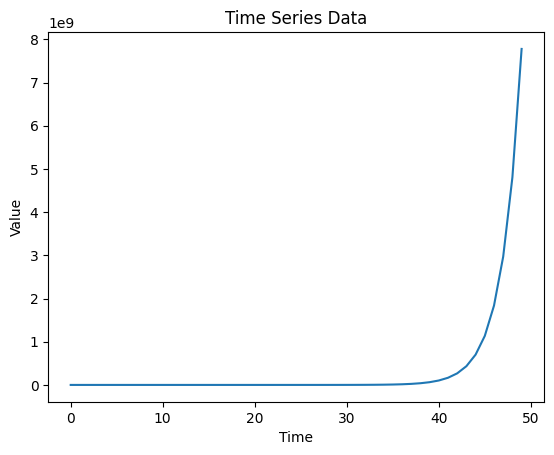

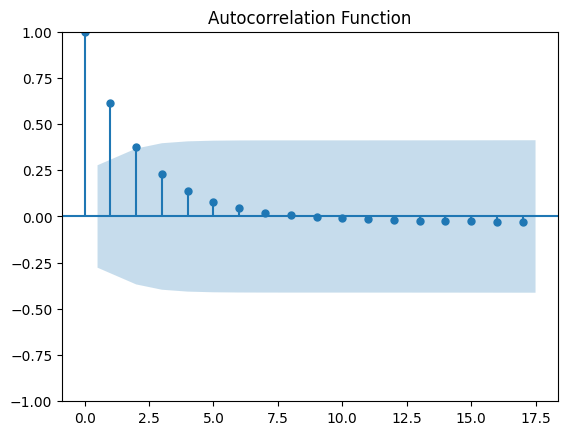

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


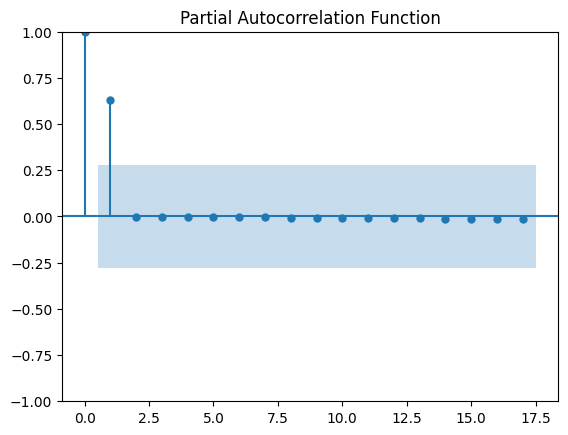

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


45    1.116091e+09
46    1.667054e+09
47    2.228671e+09
48    2.631365e+09
49    2.815995e+09
Name: predicted_mean, dtype: float64
           Value
45  1.134903e+09
46  1.836312e+09
47  2.971215e+09
48  4.807527e+09
49  7.778742e+09


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Build an ARIMA model for the series and use it for prediction.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = pd.DataFrame(series, columns=['Value'])

# Step 1: Visualize the data
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()

# Step 2: Transform the data (if needed)
# Assuming you have performed any necessary transformations on the data

# Step 3: Analyze ACF and PACF
plot_acf(data)
plt.title('Autocorrelation Function')
plt.show()

plot_pacf(data)
plt.title('Partial Autocorrelation Function')
plt.show()

# Step 4: Model selection
# Based on the ACF and PACF plots, determine the order (p, d, q) for the ARIMA model
p = 1
q = 7
d = 0
'''result = adfuller(series)
p_value = result[1]
if p_value < 0.05:
    print('The ARMA series is likely stationary.')
else:
    print('The ARMA series is likely non-stationary.')'''


# Step 5: Train the ARIMA model
# Split the data into a training set and validation set
train_data = data.iloc[:45]
valid_data = data.iloc[45:]

# Fit the ARIMA model to the training set
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

# Step 6: Evaluate the model
# Make predictions on the validation set
predictions4 = model_fit.predict(start=len(train_data), end=len(train_data) + len(valid_data) - 1)

print(predictions4)
print((valid_data))

In [ ]:
# Compare the accuracy of the four methods for the training set and the test set.
# Calculate evaluation metrics (e.g., MSE)
mse1 = np.mean((test1 - y_test) ** 2)
mse2 = np.mean((test2 - y_test) ** 2)
mse3 = np.mean((test3 - y_test) ** 2)
mse4 = np.mean((predictions4.values - valid_data.values) ** 2)
print("mse 1:", mse1)
print("mse 2:", mse2)
print("mse 3:", mse3)
print("mse 4:", mse4)

mae1 = np.mean(np.abs(test1 - y_test))
mae2 = np.mean(np.abs(test2 - y_test))
mae3 = np.mean(np.abs(test3 - y_test))
mae4 = np.mean(np.abs(predictions4.values - valid_data.values))
print("mae 1:", mae1)
print("mae 2:", mae2)
print("mae 3:", mae3)
print("mae 4:", mae4)

mape1 = np.mean(np.abs((test1 - y_test) / y_test)) * 100
mape2 = np.mean(np.abs((test2 - y_test) / y_test)) * 100
mape3 = np.mean(np.abs((test3 - y_test) / y_test)) * 100
mape4 = np.mean(np.abs((predictions4.values - valid_data.values) / valid_data.values)) * 100
print("mape 1:", mape1)
print("mape 2:", mape2)
print("mape 3:", mape3)
print("mape 4:", mape4)

mse 1: 1836817.214922969
mse 2: 1.137870875606884e+19
mse 3: 1.1508222313768581e+19
mse 4: 8.687389819158077e+18
mae 1: 1139.7694331645966
mae 2: 2601422974.6000023
mae 3: 2624228803.6400065
mae 4: 2171549984.087584
mape 1: 3.0764191426889394e-05
mape 2: 101.66563841389964
mape 3: 103.02454004592137
mape 4: 55.49301176509714


# Task 2. Decomposition-based anomaly detection

In [ ]:
import pandas as pd

df = pd.read_csv('GlobalTemperatures.csv')

df = df.iloc[1560: 3193, 0: 2]

df['dt'] = pd.to_datetime(df['dt'])

df = df.set_index('dt')

print(df)

df.loc['1998-12-1'] = 20
print(df.loc['1998-12-1'])

            LandAverageTemperature
dt                                
1880-01-01                   1.755
1880-02-01                   2.052
1880-03-01                   4.630
1880-04-01                   7.559
1880-05-01                  11.096
...                            ...
2015-08-01                  14.755
2015-09-01                  12.999
2015-10-01                  10.801
2015-11-01                   7.433
2015-12-01                   5.518

[1632 rows x 1 columns]
LandAverageTemperature    20.0
Name: 1998-12-01 00:00:00, dtype: float64


In [ ]:
def calculate_zscore(series):
    z_scores = (series - series.mean()) / series.std()
    return z_scores

def identify_outliers_boxplot(series, threshold=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers


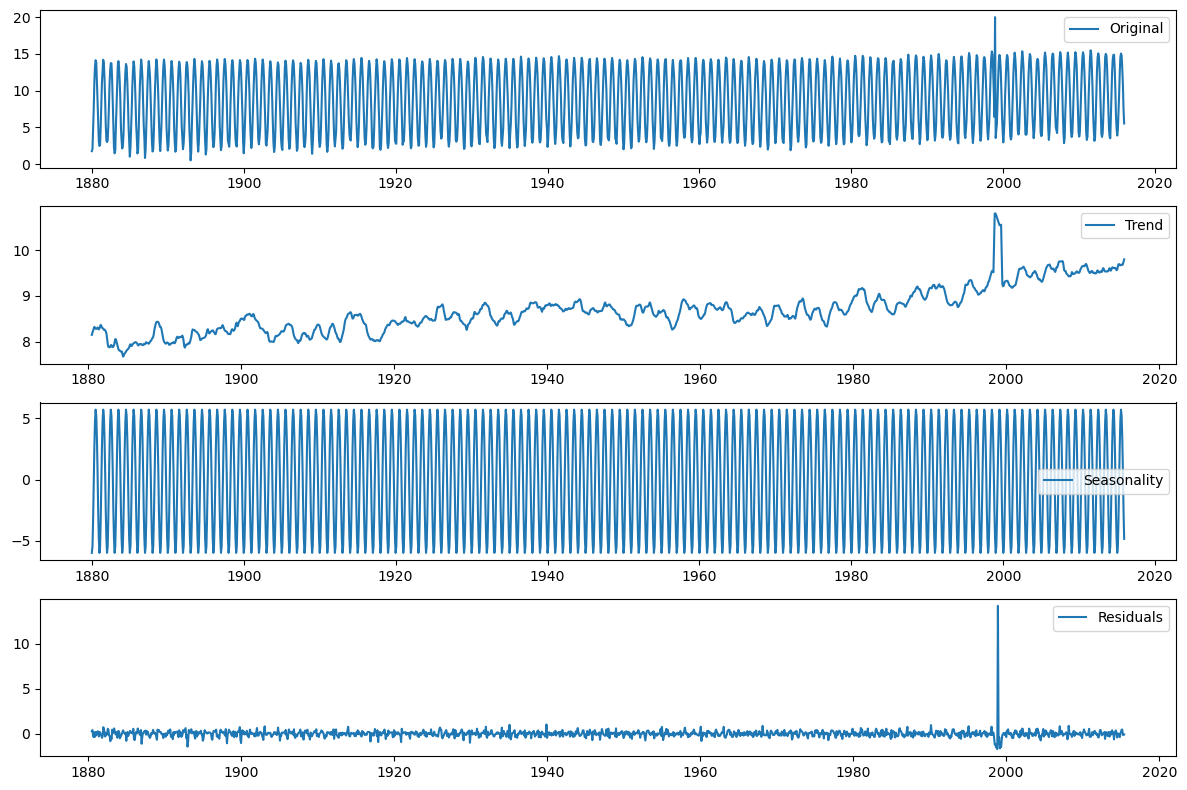

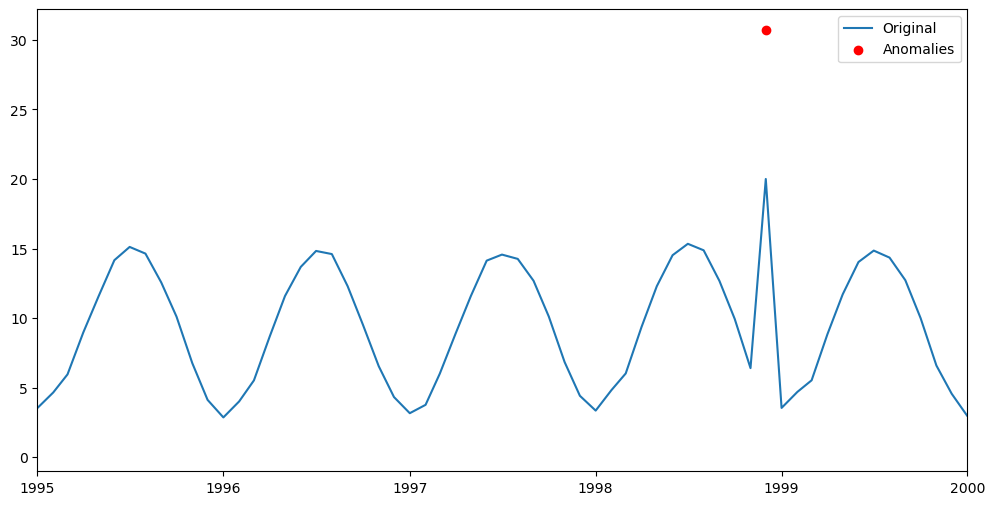

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df)

# Compositions
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualization
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Calculate z-score
z_scores = calculate_zscore(decomposition.resid)
anomaly_threshold = 4
anomalies = z_scores[abs(z_scores) > anomaly_threshold]
anomaly_indices = anomalies.index
anomaly_values = anomalies.values

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original')
plt.scatter(anomaly_indices, anomaly_values, color='r', label='Anomalies')
plt.legend(loc='best')
start_date = pd.to_datetime('1995-01-01')
end_date = pd.to_datetime('2000-01-01')
plt.xlim(start_date, end_date)
plt.show()


# Task 3. Prediction-based anomaly detection

## 3.1 Anomaly detection for uni-variate series with ARIMA

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/anomaly.csv', header=None)

#df[0] = pd.to_datetime(df[0])
df = df.set_index(0)
print(df)

         1
0         
1880 -0.50
1881 -0.43
1882 -0.46
1883 -0.67
1884 -0.71
...    ...
2016  1.54
2017  1.41
2018  1.22
2019  1.43
2020  1.59

[141 rows x 1 columns]


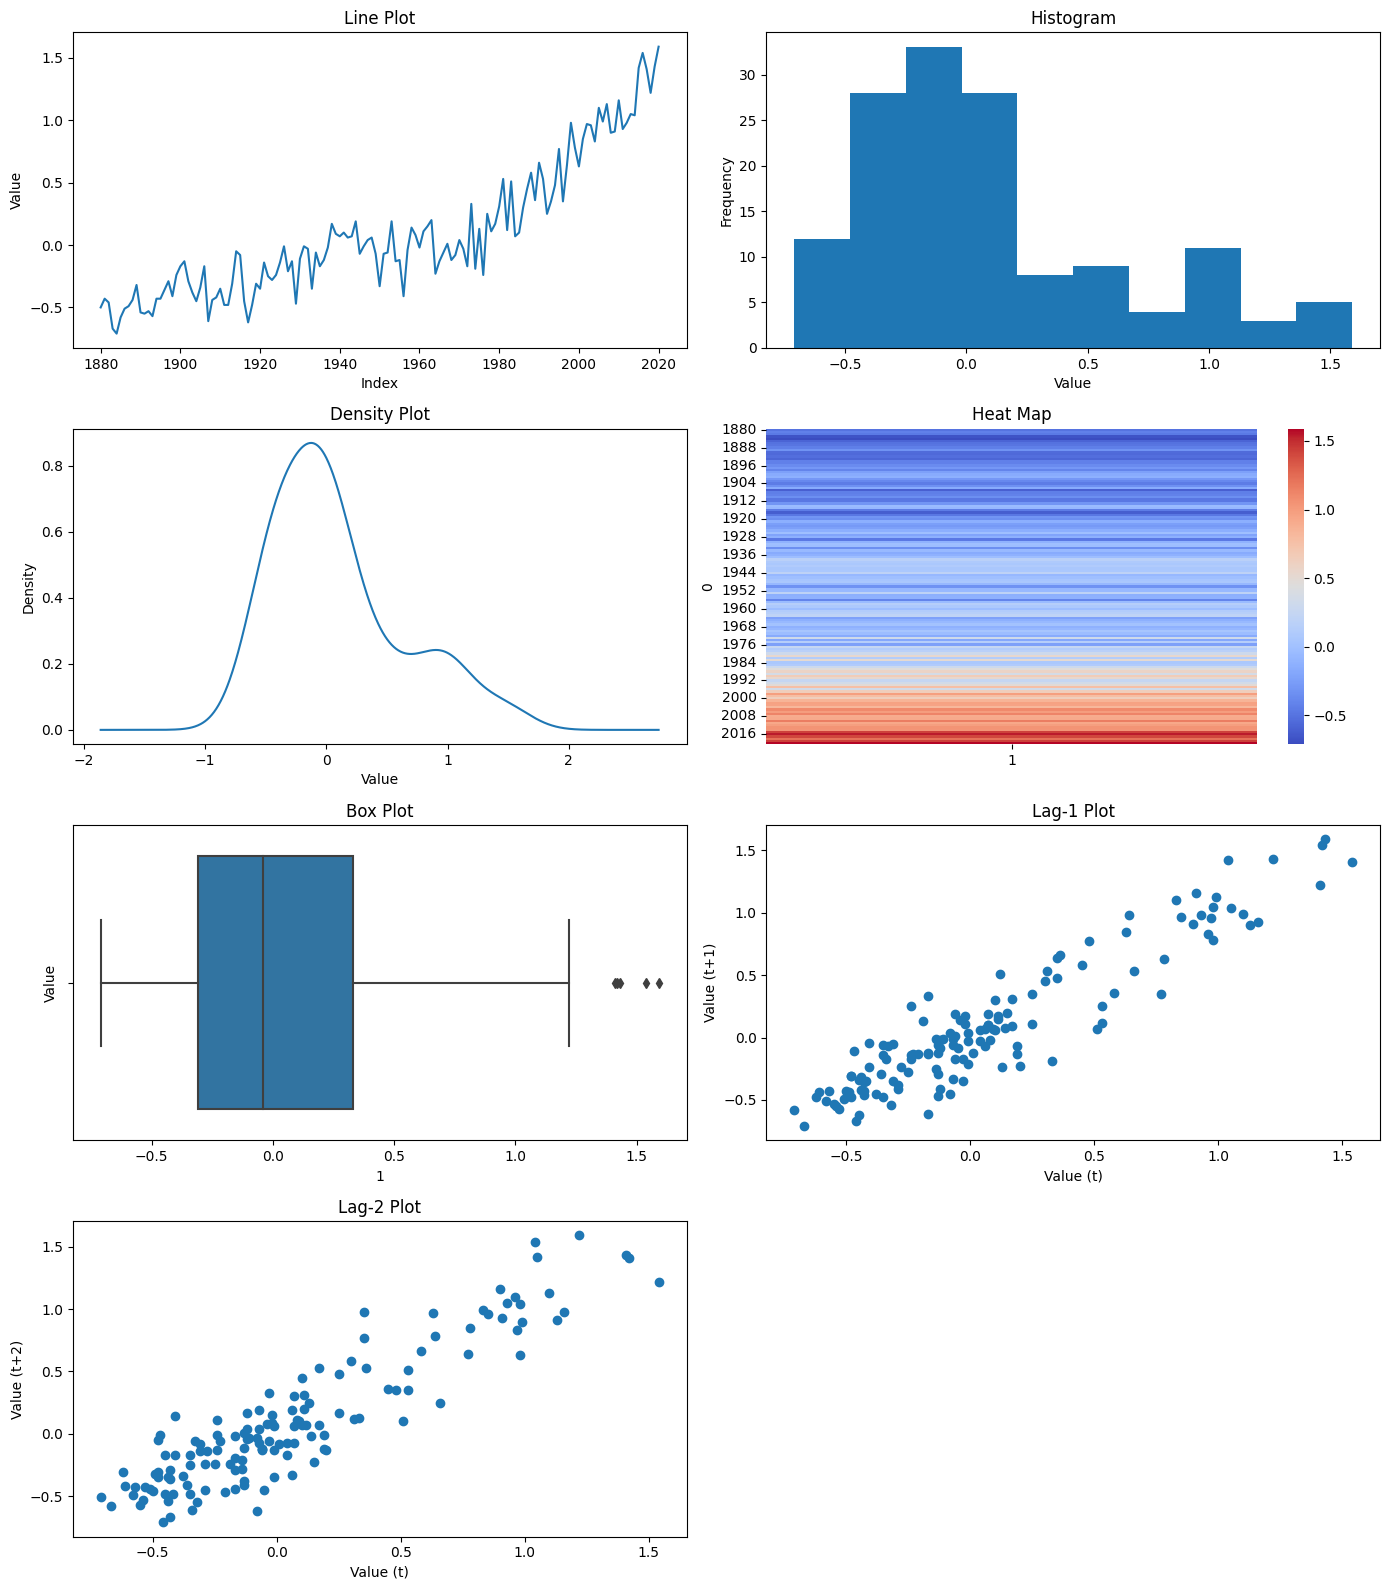

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two rows and four columns
fig, axes = plt.subplots(4, 2, figsize=(14, 16))

# Line Plot
axes[0, 0].plot(df.index, df[1])
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Value')
axes[0, 0].set_title('Line Plot')

# Histogram
axes[0, 1].hist(df[1], bins=10)
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram')

# Density Plot
df[1].plot(kind='density', ax=axes[1, 0])
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_title('Density Plot')

# Heatmap
sns.heatmap(df, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Heat Map')

# Box Plot
sns.boxplot(x=df[1], ax=axes[2, 0])
axes[2, 0].set_ylabel('Value')
axes[2, 0].set_title('Box Plot')

# Lag-1 Plot
axes[2, 1].scatter(df[1][:-1], df[1][1:])
axes[2, 1].set_xlabel('Value (t)')
axes[2, 1].set_ylabel('Value (t+1)')
axes[2, 1].set_title('Lag-1 Plot')

# Lag-2 Plot
axes[3, 0].scatter(df[1][:-2], df[1][2:])
axes[3, 0].set_xlabel('Value (t)')
axes[3, 0].set_ylabel('Value (t+2)')
axes[3, 0].set_title('Lag-2 Plot')

# Remove empty subplot
fig.delaxes(axes[3, 1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(df)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

df_diff = df.diff().dropna()
result1 = adfuller(df_diff)
print('ADF Statistic:', result1[0])
print('p-value:', result1[1])


ADF Statistic: 0.9382926419378798
p-value: 0.993570249862259
ADF Statistic: -12.165503286659833
p-value: 1.4604869372131342e-22


**Since p-value < 0.05, we reject the Null hypothesis. Thus the series is stationary after first-order  differencing.**

count    140.000000
mean       0.014929
std        0.199584
min       -0.520000
25%       -0.112500
50%        0.040000
75%        0.132500
max        0.500000
Name: 1, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


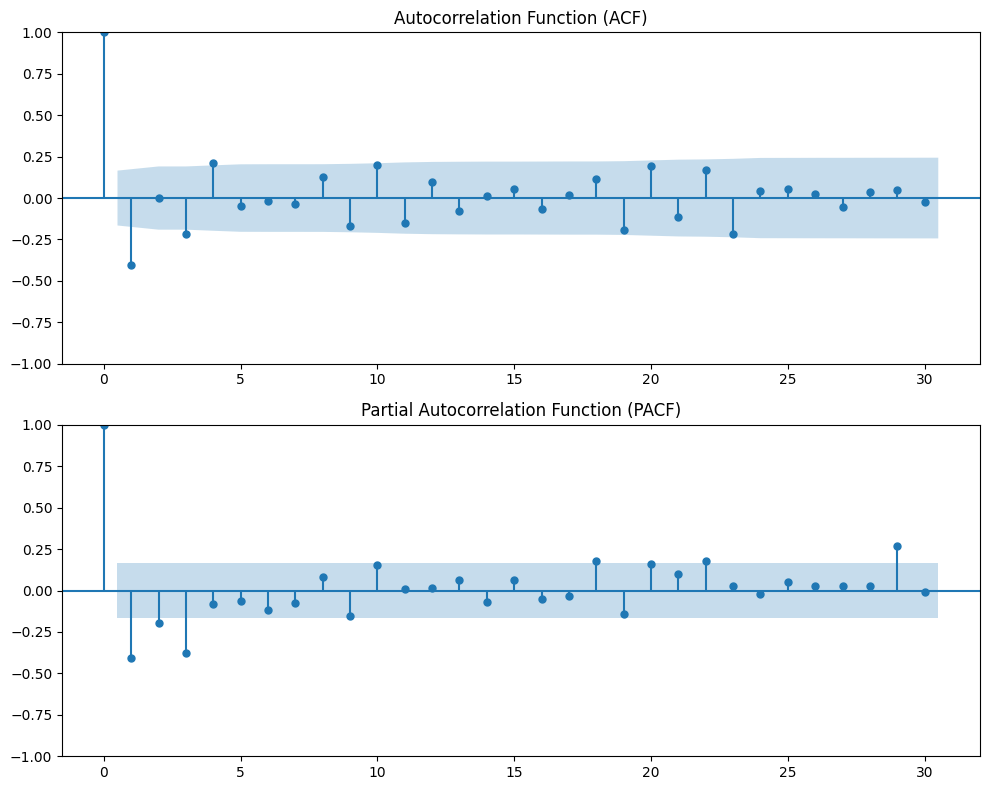

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Statistical summary
summary = df_diff[1].describe()
print(summary)

# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# ACF plot
sm.graphics.tsa.plot_acf(df_diff[1], ax=ax1, lags=30)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
sm.graphics.tsa.plot_pacf(df_diff[1], ax=ax2, lags=30)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

**p = 1, d = 1, q = 1**

In [ ]:
from pmdarima.arima import auto_arima

# Fit ARIMA model using auto_arima
model = auto_arima(df[1], trace=True, suppress_warnings=True)
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


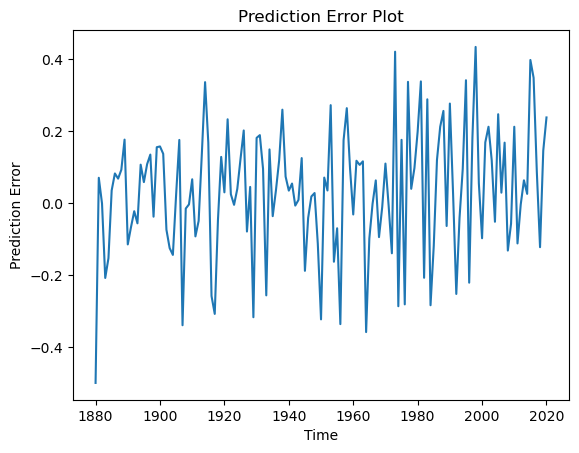

,lb_stat,lb_pvalue
1,0.310934,0.577108
2,0.702121,0.703941
3,3.857368,0.277283
4,7.192476,0.126060
5,7.251295,0.202612
6,7.502424,0.276868
7,7.547271,0.374200
8,8.645017,0.373121
9,9.823031,0.365001
10,13.752790,0.184569


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

model_fit = model.fit()

# Generate in-sample predictions
predictions = model_fit.predict()

# Calculate prediction errors
errors = df[1].values[0:] - predictions

# Plot the prediction errors
plt.plot(errors)
plt.xlabel('Time')
plt.ylabel('Prediction Error')
plt.title('Prediction Error Plot')
plt.show()

# Check if the remainder (prediction error) series is random
# Ljung-Box Test
acorr_ljungbox(errors, lags=10)

**lb_pvalue > 0.05 (default threshold), then accept the Null hypothesis that the series is independent, meaning that the error series is random.**

5.039310182695746e-17


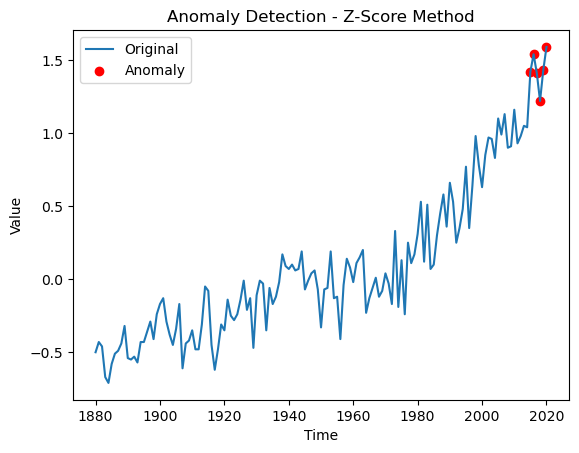

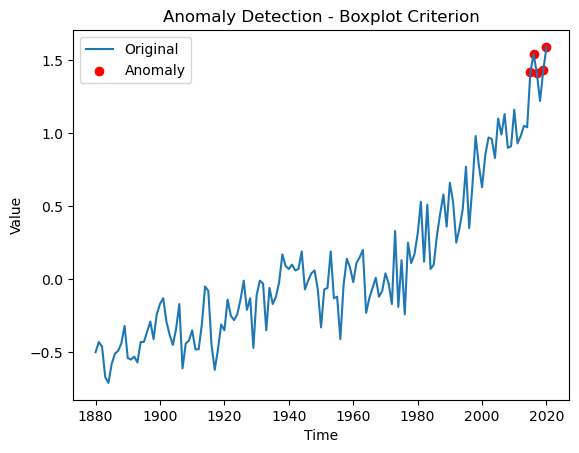

In [ ]:
import numpy as np

# Calculate the Z-score
z_scores = (df[1] - df[1].mean()) / df[1].std()
print(np.mean(z_scores))
# Define the threshold for outliers (e.g., Z-score > 3)
threshold = 2

# Mark the anomaly points
anomaly_points_zscore = df[z_scores.abs() > threshold]

# Plot the original series with marked anomaly points
plt.plot(df[1], label='Original')
plt.scatter(anomaly_points_zscore.index, anomaly_points_zscore[1], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Anomaly Detection - Z-Score Method')
plt.legend()
plt.show()

# Calculate the quartiles and IQR
Q1 = np.percentile(df[1], 25)
Q3 = np.percentile(df[1], 75)
IQR = Q3 - Q1

# Define the lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Mark the anomaly points
anomaly_points_boxplot = df[(df[1] < lower_fence) | (df[1] > upper_fence)]

# Plot the original series with marked anomaly points
plt.plot(df[1], label='Original')
plt.scatter(anomaly_points_boxplot.index, anomaly_points_boxplot[1], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Anomaly Detection - Boxplot Criterion')
plt.legend()
plt.show()



## 3.2 Anomaly detection in ECG signals with LSTM

In [ ]:
import pandas as pd

df = pd.read_csv('100.csv', header=None)
df = df.iloc[2: , :]
df = df.set_index(0)
print(df)

             1       2
0                     
0       -0.145  -0.065
0.003   -0.145  -0.065
0.006   -0.145  -0.065
0.008   -0.145  -0.065
0.011   -0.145  -0.065
...        ...     ...
59.986   -0.22   -0.15
59.989   -0.21  -0.145
59.992   -0.23  -0.175
59.994  -0.245   -0.18
59.997  -0.245  -0.175

[21600 rows x 2 columns]


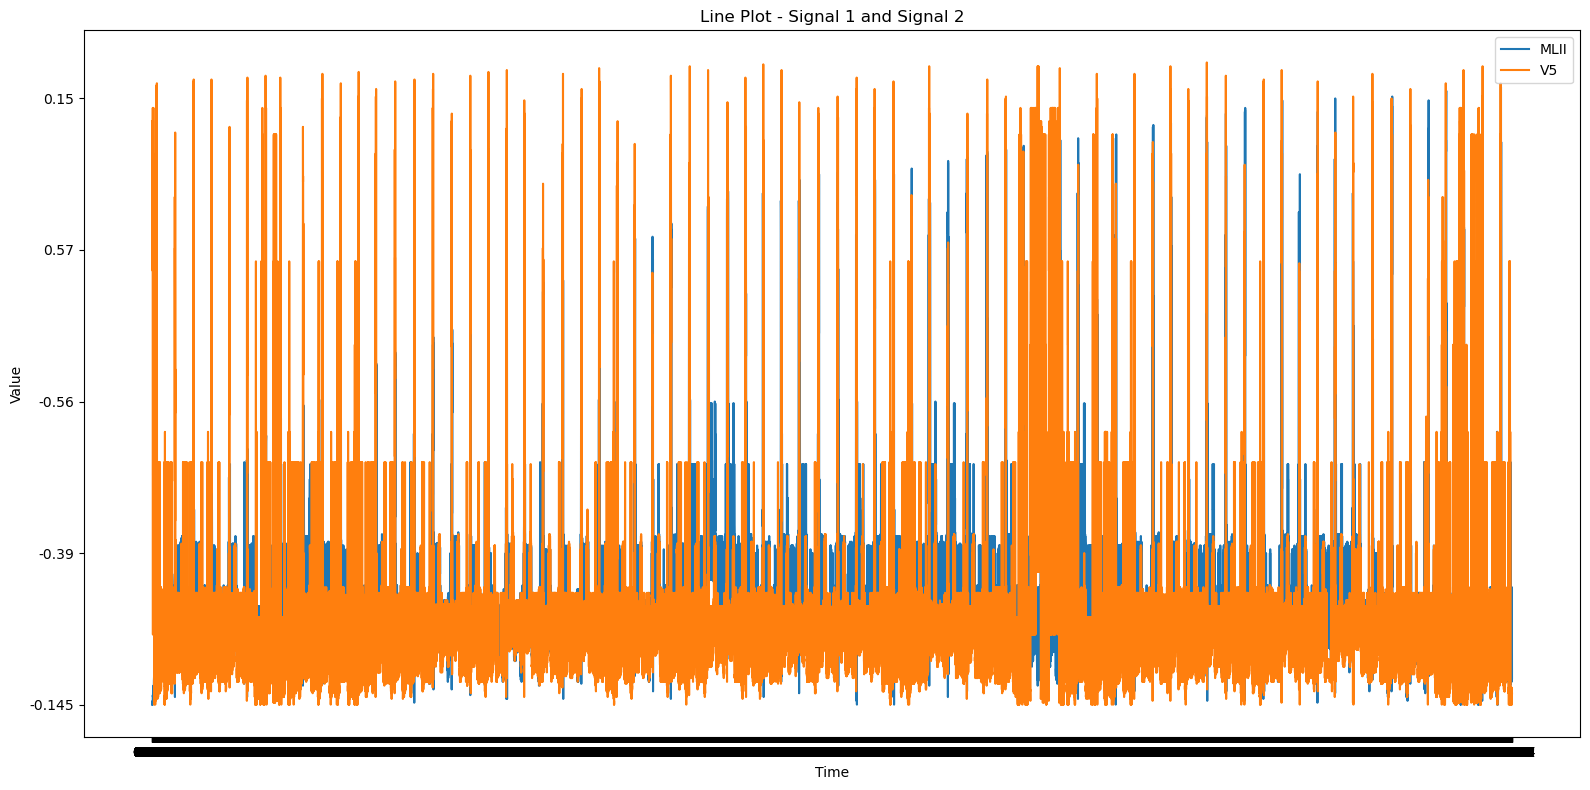

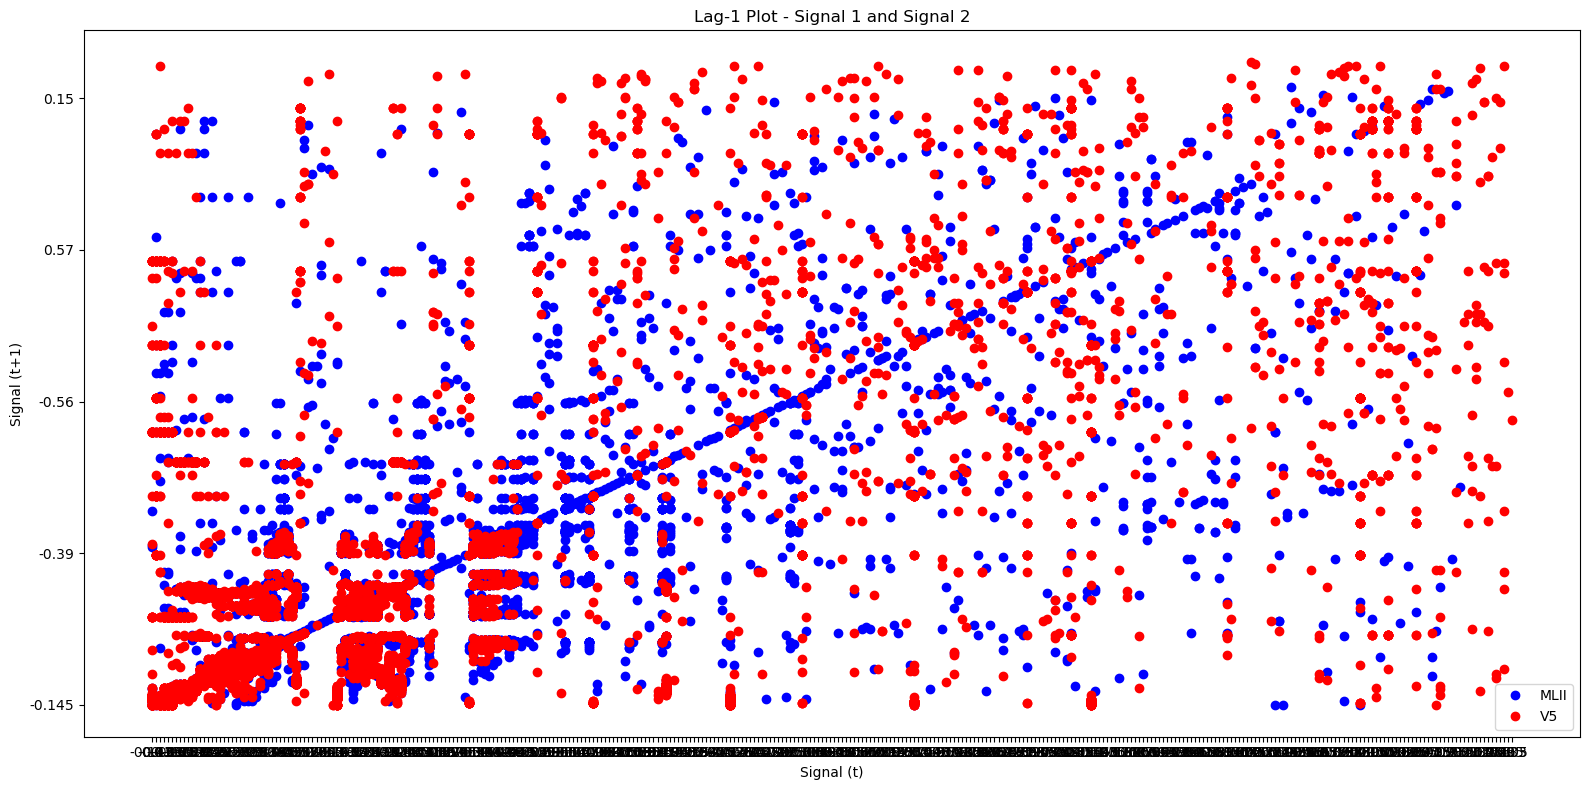

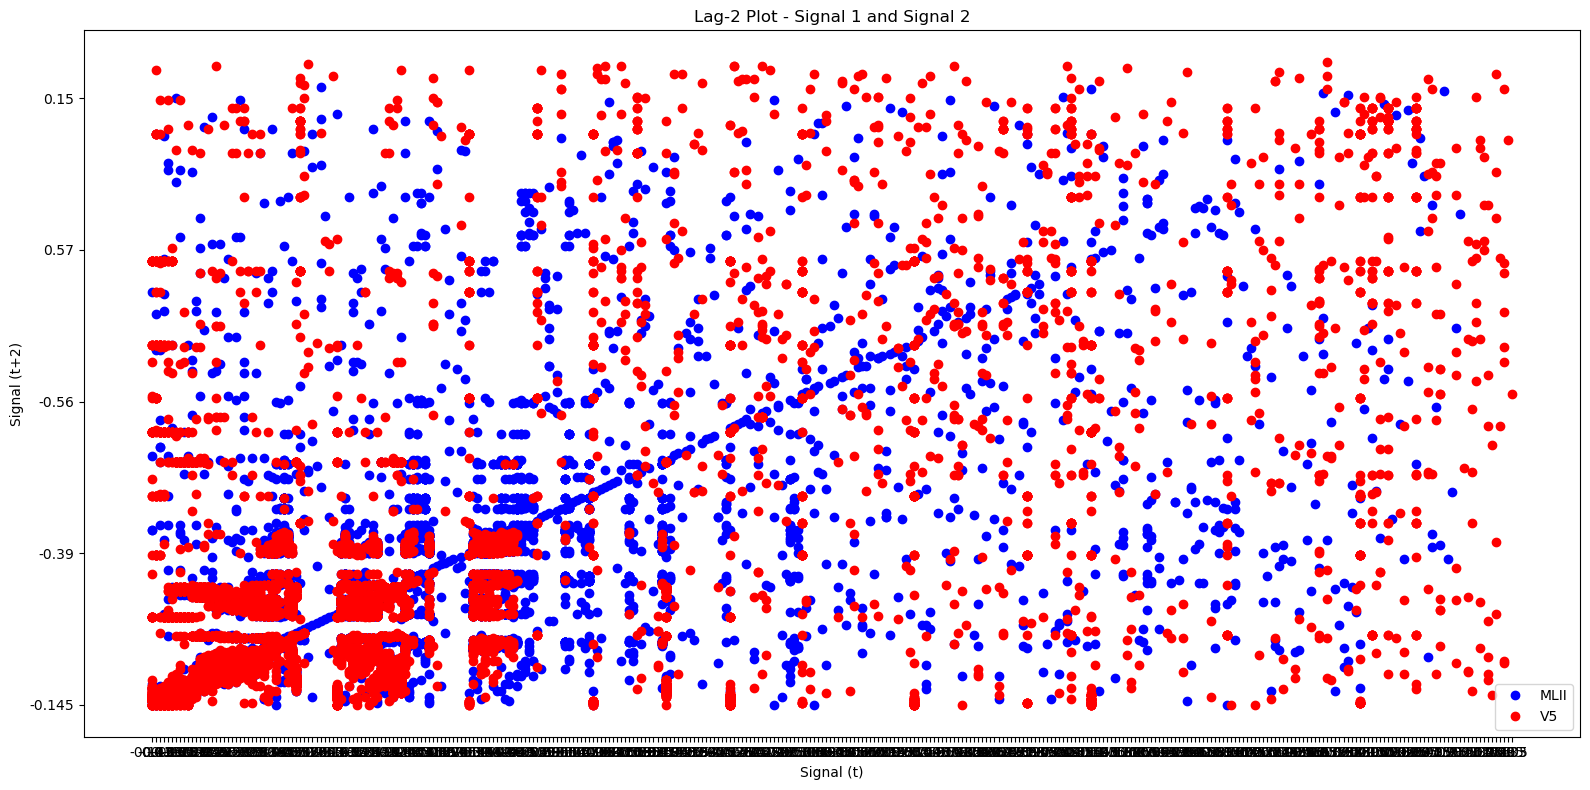

In [ ]:
###########################
#Exploratory data analysis#
###########################

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Line plot for signal 1 and signal 2
plt.figure(figsize=(16, 8))
plt.plot(df[1], label='MLII')
plt.plot(df[2], label='V5')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Line Plot - Signal 1 and Signal 2')
plt.legend()
# Adjust y-axis tick frequency
for ax in plt.gcf().get_axes():
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.tight_layout()
plt.show()

# Lag-1 plot for signal 1 and signal 2
plt.figure(figsize=(16, 8))
plt.plot(df[1][:-1], df[1][1:], 'bo', label='MLII')
plt.plot(df[2][:-1], df[2][1:], 'ro', label='V5')
plt.xlabel('Signal (t)')
plt.ylabel('Signal (t+1)')
plt.title('Lag-1 Plot - Signal 1 and Signal 2')
plt.legend()
# Adjust y-axis tick frequency
for ax in plt.gcf().get_axes():
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.tight_layout()
plt.show()

# Lag-2 plot for signal 1 and signal 2
plt.figure(figsize=(16, 8))
plt.plot(df[1][:-2], df[1][2:], 'bo', label='MLII')
plt.plot(df[2][:-2], df[2][2:], 'ro', label='V5')
plt.xlabel('Signal (t)')
plt.ylabel('Signal (t+2)')
plt.title('Lag-2 Plot - Signal 1 and Signal 2')
plt.legend()
# Adjust y-axis tick frequency
for ax in plt.gcf().get_axes():
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.tight_layout()
plt.show()


In [ ]:
def create_sequences(data, input_size, output_size):
    X = []
    y = []
    for i in range(len(data) - input_size - output_size + 1):
        X.append(data[i:i+input_size])
        y.append(data[i+input_size:i+input_size+output_size])
    return np.array(X), np.array(y)

In [ ]:
# Model construction
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Convert the DataFrame to a NumPy array
datastr = df.values
data = [[float(num) for num in sublist] for sublist in datastr]

# Define the train-test split ratio
train_ratio = 0.8
train_size = int(len(data) * train_ratio)

# Split the data into train and test sets
train_data = data[:train_size]
test_data = data[train_size:]

In [ ]:
##################
# input_size = 4 #
##################

input_size = 4
output_size = 1

######## bi-variate ########

# Create input and output sequences for training and test sets
X_train1, y_train1 = create_sequences(train_data, input_size, output_size)
X_test1, y_test1 = create_sequences(test_data, input_size, output_size)

# Define the LSTM model
model1 = Sequential()
model1.add(LSTM(64, input_shape=(input_size, 2)))  # For the bi-variate series
model1.add(Dense(output_size))

# Compile the model
model1.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model1.fit(X_train1, y_train1, epochs=10, batch_size=32, verbose=0)

# Prediction
predictions1 = model1.predict(X_test1)

mse = np.mean((predictions1 - y_test1) ** 2)
mape = np.mean(np.abs((predictions1 - y_test1) / y_test1) * 100)

print("LSTM loss(MSE) - bi-variate:", mse)
print("LSTM loss(MAPE) - uni-variate:", mape)


######## uni-variate ########

# Split the signals
sig1_train, sig2_train = zip(*train_data)
sig1_test, sig2_test = zip(*test_data)

sigX_train1, sigy_train1 = create_sequences(sig1_train, input_size, output_size)
sigX_test1, sigy_test1 = create_sequences(sig1_test, input_size, output_size)

sigX_train2, sigy_train2 = create_sequences(sig2_train, input_size, output_size)
sigX_test2, sigy_test2 = create_sequences(sig2_test, input_size, output_size)

# Define the LSTM model
model2_1 = Sequential()
model2_1.add(LSTM(64, input_shape=(input_size, 1)))  # For individual uni-variate series
model2_1.add(Dense(output_size))

model2_2 = Sequential()
model2_2.add(LSTM(64, input_shape=(input_size, 1)))  # For individual uni-variate series
model2_2.add(Dense(output_size))

# Compile the model
model2_1.compile(loss='mean_squared_error', optimizer='adam')
model2_2.compile(loss='mean_squared_error', optimizer='adam')

# Train the model2-1
model2_1.fit(sigX_train1, sigy_train1, epochs=10, batch_size=32, verbose=0)
model2_2.fit(sigX_train2, sigy_train2, epochs=10, batch_size=32, verbose=0)

# Prediction
predictions2_1 = model2_1.predict(sigX_test1)
predictions2_2 = model2_2.predict(sigX_test2)
merged_pred = np.concatenate((predictions2_1, predictions2_2), axis=1)
merged_test = np.concatenate((sigy_test1, sigy_test2), axis=1)

mse = np.mean((merged_pred - merged_test) ** 2)
mape = np.mean(np.abs((merged_pred - merged_test) / merged_test) * 100)

print("LSTM loss(MSE) - uni-variate:", mse)
print("LSTM loss(MAPE) - uni-variate:", mape)


135/135 [==============================] - 0s 706us/step
LSTM loss(MSE) - bi-variate: 0.02726774633028784
LSTM loss(MAPE) - uni-variate: 44.37708049964911
135/135 [==============================] - 0s 658us/step
LSTM loss(MSE) - uni-variate: 0.000307643921044928
LSTM loss(MAPE) - uni-variate: 5.3417325865364935


In [ ]:
##################
# input_size = 8 #
##################

input_size = 8
output_size = 1

######## bi-variate ########

# Create input and output sequences for training and test sets
X_train1, y_train1 = create_sequences(train_data, input_size, output_size)
X_test1, y_test1 = create_sequences(test_data, input_size, output_size)

# Define the LSTM model
model1 = Sequential()
model1.add(LSTM(64, input_shape=(input_size, 2)))  # For the bi-variate series
model1.add(Dense(output_size))

# Compile the model
model1.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model1.fit(X_train1, y_train1, epochs=10, batch_size=32, verbose=0)

# Prediction
predictions1 = model1.predict(X_test1)

mse = np.mean((predictions1 - y_test1) ** 2)
mape = np.mean(np.abs((predictions1 - y_test1) / y_test1) * 100)

print("LSTM loss(MSE) - bi-variate:", mse)
print("LSTM loss(MAPE) - uni-variate:", mape)


######## uni-variate ########

# Split the signals
sig1_train, sig2_train = zip(*train_data)
sig1_test, sig2_test = zip(*test_data)

sigX_train1, sigy_train1 = create_sequences(sig1_train, input_size, output_size)
sigX_test1, sigy_test1 = create_sequences(sig1_test, input_size, output_size)

sigX_train2, sigy_train2 = create_sequences(sig2_train, input_size, output_size)
sigX_test2, sigy_test2 = create_sequences(sig2_test, input_size, output_size)

# Define the LSTM model
model2_1 = Sequential()
model2_1.add(LSTM(64, input_shape=(input_size, 1)))  # For individual uni-variate series
model2_1.add(Dense(output_size))

model2_2 = Sequential()
model2_2.add(LSTM(64, input_shape=(input_size, 1)))  # For individual uni-variate series
model2_2.add(Dense(output_size))

# Compile the model
model2_1.compile(loss='mean_squared_error', optimizer='adam')
model2_2.compile(loss='mean_squared_error', optimizer='adam')

# Train the model2-1
model2_1.fit(sigX_train1, sigy_train1, epochs=10, batch_size=32, verbose=0)
model2_2.fit(sigX_train2, sigy_train2, epochs=10, batch_size=32, verbose=0)

# Prediction
predictions2_1 = model2_1.predict(sigX_test1)
predictions2_2 = model2_2.predict(sigX_test2)
merged_pred = np.concatenate((predictions2_1, predictions2_2), axis=1)
merged_test = np.concatenate((sigy_test1, sigy_test2), axis=1)

mse = np.mean((merged_pred - merged_test) ** 2)
mape = np.mean(np.abs((merged_pred - merged_test) / merged_test) * 100)

print("LSTM loss(MSE) - uni-variate:", mse)
print("LSTM loss(MAPE) - uni-variate:", mape)

135/135 [==============================] - 0s 1ms/step
LSTM loss(MSE) - bi-variate: 0.026848470275347192
LSTM loss(MAPE) - uni-variate: 42.905170269618935
135/135 [==============================] - 0s 984us/step
LSTM loss(MSE) - uni-variate: 0.000292018658930404
LSTM loss(MAPE) - uni-variate: 5.226200225447469


In [ ]:
###################
# input_size = 16 #
###################

input_size = 16
output_size = 1

######## bi-variate ########

# Create input and output sequences for training and test sets
X_train1, y_train1 = create_sequences(train_data, input_size, output_size)
X_test1, y_test1 = create_sequences(test_data, input_size, output_size)

# Define the LSTM model
model1 = Sequential()
model1.add(LSTM(64, input_shape=(input_size, 2)))  # For the bi-variate series
model1.add(Dense(output_size))

# Compile the model
model1.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model1.fit(X_train1, y_train1, epochs=10, batch_size=32, verbose=0)

# Prediction
predictions1 = model1.predict(X_test1)

mse = np.mean((predictions1 - y_test1) ** 2)
mape = np.mean(np.abs((predictions1 - y_test1) / y_test1) * 100)

print("LSTM loss(MSE) - bi-variate:", mse)
print("LSTM loss(MAPE) - uni-variate:", mape)


######## uni-variate ########

# Split the signals
sig1_train, sig2_train = zip(*train_data)
sig1_test, sig2_test = zip(*test_data)

sigX_train1, sigy_train1 = create_sequences(sig1_train, input_size, output_size)
sigX_test1, sigy_test1 = create_sequences(sig1_test, input_size, output_size)

sigX_train2, sigy_train2 = create_sequences(sig2_train, input_size, output_size)
sigX_test2, sigy_test2 = create_sequences(sig2_test, input_size, output_size)

# Define the LSTM model
model2_1 = Sequential()
model2_1.add(LSTM(64, input_shape=(input_size, 1)))  # For individual uni-variate series
model2_1.add(Dense(output_size))

model2_2 = Sequential()
model2_2.add(LSTM(64, input_shape=(input_size, 1)))  # For individual uni-variate series
model2_2.add(Dense(output_size))

# Compile the model
model2_1.compile(loss='mean_squared_error', optimizer='adam')
model2_2.compile(loss='mean_squared_error', optimizer='adam')

# Train the model2-1
model2_1.fit(sigX_train1, sigy_train1, epochs=10, batch_size=32, verbose=0)
model2_2.fit(sigX_train2, sigy_train2, epochs=10, batch_size=32, verbose=0)

# Prediction
predictions2_1 = model2_1.predict(sigX_test1)
predictions2_2 = model2_2.predict(sigX_test2)
merged_pred = np.concatenate((predictions2_1, predictions2_2), axis=1)
merged_test = np.concatenate((sigy_test1, sigy_test2), axis=1)

mse = np.mean((merged_pred - merged_test) ** 2)
mape = np.mean(np.abs((merged_pred - merged_test) / merged_test) * 100)

print("LSTM loss(MSE) - uni-variate:", mse)
print("LSTM loss(MAPE) - uni-variate:", mape)

135/135 [==============================] - 0s 2ms/step
LSTM loss(MSE) - bi-variate: 0.02708212208999115
LSTM loss(MAPE) - uni-variate: 43.6098268811316
135/135 [==============================] - 0s 2ms/step
LSTM loss(MSE) - uni-variate: 0.0003301944912095785
LSTM loss(MAPE) - uni-variate: 5.633741959010342


Prediction Error Series: [0.01088488 0.02080177 0.01243805 ... 0.03715252 0.01989214 0.0221441 ]
Anomaly Points: [ 362  372  373  374  375  376  662 1796 2389 2390 2392 2401 2409 2410
 2702 2705 2949 2950 2960 2961 2983 4136]


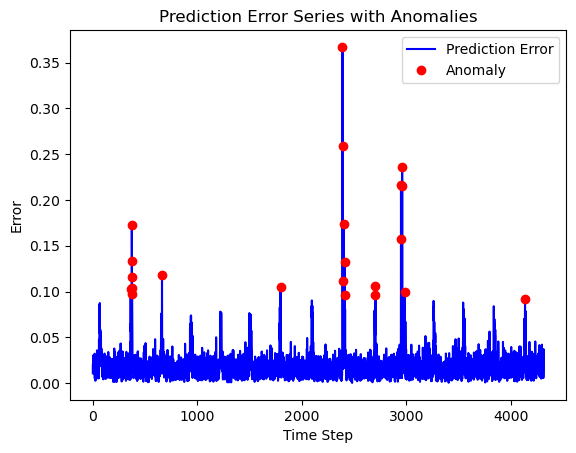

In [ ]:
# Base on the model trained with input size = 8

import numpy as np

def calculate_prediction_error(actual_values, predicted_values):
    error_series = np.linalg.norm(actual_values - predicted_values, axis=1)
    return error_series

def mark_anomalies(error_series, error_rate):
    threshold = np.percentile(error_series, 100 - error_rate)
    anomalies = np.where(error_series > threshold)[0]
    return anomalies

error_rate = 0.5

prediction_error = calculate_prediction_error(merged_pred, merged_test)
anomaly_points = mark_anomalies(prediction_error, error_rate)

print("Prediction Error Series:", prediction_error)
print("Anomaly Points:", anomaly_points)


# Plotting the prediction error series
plt.plot(prediction_error, color='blue', label='Prediction Error')
plt.plot(anomaly_points, prediction_error[anomaly_points], 'ro', label='Anomaly')
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.title('Prediction Error Series with Anomalies')
plt.legend()
plt.show()

# Task 4. Clustering-based Anomaly detection

X1: [ 0.70245989 -0.19553525  0.91596991  2.15388948 -0.33114288 -0.33111966
  2.23334418  1.0853166  -0.66393704  0.76729577 -0.65537159 -0.65864133
  0.34218633 -2.70578687 -2.43940219 -0.79519465 -1.43235951  0.44441284
 -1.28413996 -1.99729905  2.07274037 -0.31929591  0.0954993  -2.01489821
 -0.76987343  0.15686823 -1.62775073  0.53131723 -0.84943138 -0.41251726
 -0.85094165  2.61951693 -0.01908796 -1.49582914  1.16325417 -1.72653365
  0.29537773 -2.77139207 -1.87833872  0.27840383  1.04434945  0.24235135
 -0.16355137 -0.42582493 -2.09094585 -1.01801344 -0.6514416   1.49499659
  0.48594965 -2.4933153 ]
X2: [ 1.50598774  1.79306908  2.53166576  2.49030115 -0.9483187  -0.32628489
  1.72836986  1.72660306  1.72838742  6.44858513  1.8073611   2.60593233
  2.34916223  1.92120634  0.55414196  2.07334457 -0.0929399   0.66508791
  0.31359229  1.11578752  4.27342154 -1.64071176  1.97051847 -1.28072466
  0.33258755  2.5400087   1.09090567 -0.52416128 -0.01159221  1.96109635
 -0.0328944   1.3

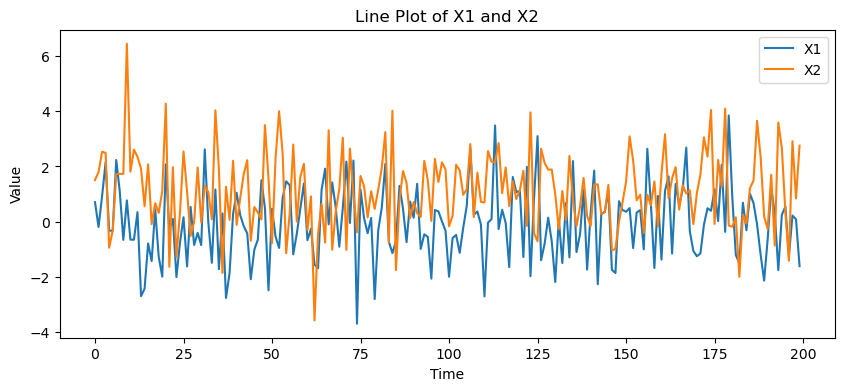

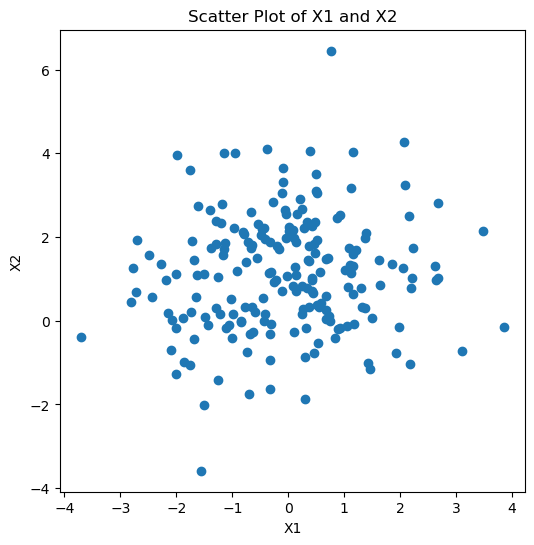

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Define the parameters for X1
mean_x1 = 0
variance_x1 = 2
std_dev_x1 = np.sqrt(variance_x1)

# Generate X1 data
x1 = np.random.normal(mean_x1, std_dev_x1, 200)

# Define the parameters for X2
mean_x2 = 1
variance_x2 = 2
std_dev_x2 = np.sqrt(variance_x2)

# Generate X2 data
x2 = np.random.normal(mean_x2, std_dev_x2, 200)

# Print the first few data points of X1 and X2
print("X1:", x1[:50])
print("X2:", x2[:50])

# Line plot
plt.figure(figsize=(10, 4))
plt.plot(x1, label='X1')
plt.plot(x2, label='X2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Line Plot of X1 and X2')
plt.legend()
plt.show()

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x1, x2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of X1 and X2')
plt.show()


data = np.concatenate((x1[:, np.newaxis], x2[:, np.newaxis]), axis=1)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Set the number of clusters
num_clusters = 4

# Concatenate the variables into a single array

# Perform clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data)

# Get the cluster labels
labels = kmeans.labels_
print(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 1 1 3 3 2 2 0 1 0 0 1 0 3 0 3 2 3 0 1 3 1 3 3 1 0 2 3 0 3 2 2 3 1 0 3
 0 3 1 2 2 0 0 3 3 3 2 1 0 2 0 1 1 2 2 0 3 2 1 3 0 3 3 2 2 1 2 2 0 1 2 1 2
 3 2 2 3 2 3 0 1 1 3 1 3 2 1 0 2 2 2 3 0 0 3 1 2 1 0 3 3 0 0 0 2 1 2 1 2 3
 1 1 2 1 2 1 3 2 2 2 0 2 0 2 2 0 0 1 0 0 2 0 2 0 2 3 3 2 3 2 2 0 2 2 2 3 3
 2 2 2 1 0 2 2 3 2 2 0 2 0 1 2 0 1 2 2 2 0 3 0 0 1 1 1 2 1 2 1 2 2 3 3 2 3
 2 2 1 0 3 3 2 3 0 1 2 3 1 2 0]


In [ ]:
# Calculate the distances
distances = kmeans.transform(data)

# Get the minimum distance for each point
min_distances = np.min(distances, axis=1)


In [ ]:
# Set the outlier ratio
outlier_ratio = 0.05

# Determine the number of outliers
num_outliers = int(outlier_ratio * len(data))

# Get the indices of the points with the largest distances (outliers)
outlier_indices = np.argsort(min_distances)[-num_outliers:]

# Split the data into normal and anomalous subsets
normal_data = data[np.setdiff1d(np.arange(len(data)), outlier_indices)]
anomalous_data = data[outlier_indices]


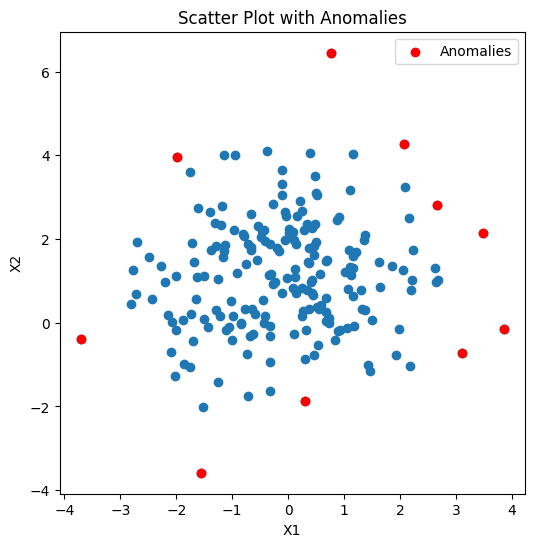

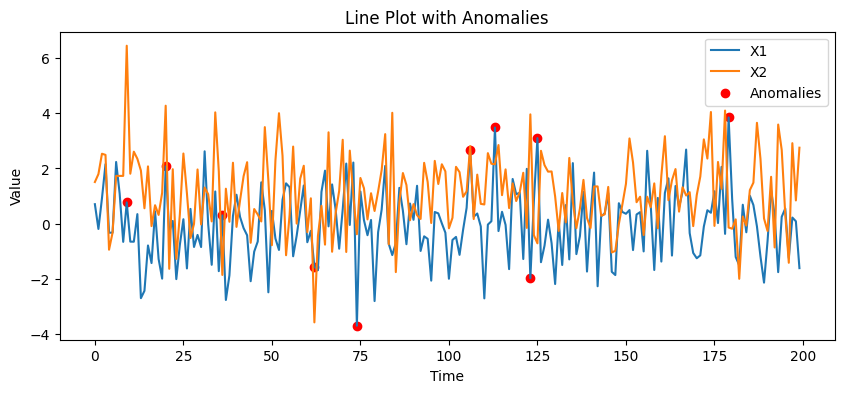

In [ ]:
# Scatter plot of anomalies
plt.figure(figsize=(6, 6))
plt.scatter(x1, x2)
plt.scatter(anomalous_data[:, 0], anomalous_data[:, 1], color='red', label='Anomalies')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot with Anomalies')
plt.legend()
plt.show()

# Line plot of anomalies
plt.figure(figsize=(10, 4))
plt.plot(x1, label='X1')
plt.plot(x2, label='X2')
plt.scatter(outlier_indices, x1[outlier_indices], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Line Plot with Anomalies')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from minisom import MiniSom

data_normalized = (data - data.mean(axis=0)) / data.std(axis=0) 

grid_size = (200, 200) 
som = MiniSom(grid_size[0], grid_size[1], data.shape[1], sigma=1.0, learning_rate=0.2)
som.random_weights_init(data_normalized)
som.train_batch(data_normalized, 500)  

quantization_errors = np.zeros(data.shape[0])
for i, sample in enumerate(data_normalized):
    quantization_errors[i] = np.linalg.norm(sample - som.winner(sample))

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 1.3558249577238275
Error treshold: 1.95


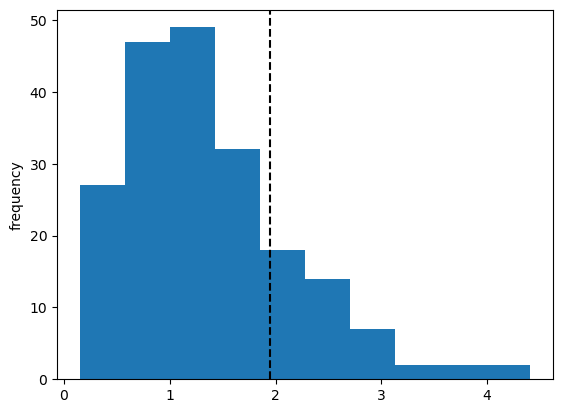

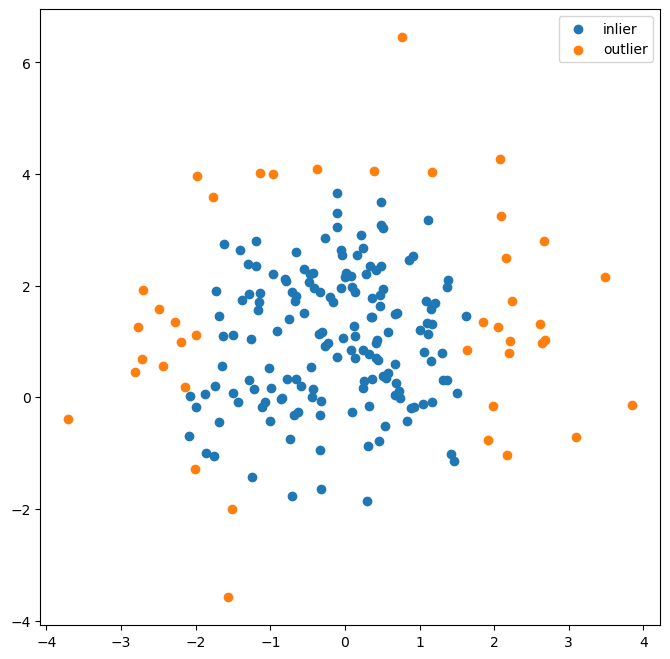

In [ ]:
outlier_ratio = 0.05
som = MiniSom(2, 1, data.shape[1], sigma=1, learning_rate=0.5,
              neighborhood_function='triangle', random_seed=10)


som.train(data, 100, random_order=False, verbose=True)  # random training

quantization_errors = np.linalg.norm(som.quantization(data) - data, axis=1)
#error_treshold = 1.95
num_outliers = int(outlier_ratio * len(data))
outlier_indices = np.argsort(quantization_errors)[-num_outliers:]

#print('Error treshold:', error_treshold)

is_outlier = quantization_errors > error_treshold

plt.hist(quantization_errors)
plt.axvline(error_treshold, color='k', linestyle='--')

plt.ylabel('frequency')

plt.figure(figsize=(8, 8))
plt.scatter(data[~is_outlier, 0], data[~is_outlier, 1],
            label='inlier')
plt.scatter(data[is_outlier, 0], data[is_outlier, 1],
            label='outlier')
plt.legend()
plt.show()

In [ ]:
# Set the outlier ratio
outlier_ratio = 0.05

# Determine the number of outliers
num_outliers = int(outlier_ratio * len(data))

# Get the indices of the points with the largest distances (outliers)
outlier_indices = np.argsort(quantization_errors)[-num_outliers:]

# Split the data into normal and anomalous subsets
normal_data = data[np.setdiff1d(np.arange(len(data)), outlier_indices)]
anomalous_data = data[outlier_indices]

print(anomalous_data)

[[-4.37292336e-01 -7.95755955e-04]
 [ 3.02774277e-01 -8.67091707e-01]
 [ 3.48355040e+00  2.15047636e+00]
 [ 2.95377729e-01 -1.86398411e+00]
 [-3.31142878e-01 -9.48318705e-01]
 [-3.10662963e-01  1.16053777e+00]
 [-6.31467501e-01 -2.70550213e-01]
 [ 3.28456328e-01  7.73812762e-01]
 [ 7.38136841e-01 -1.60335615e-02]
 [-1.51447069e+00 -2.00364214e+00]]


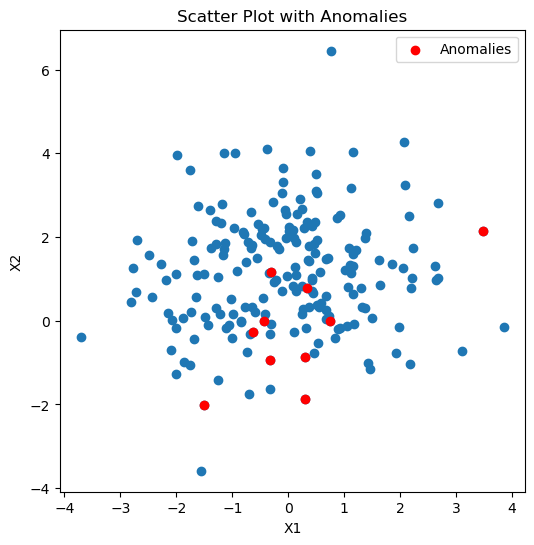

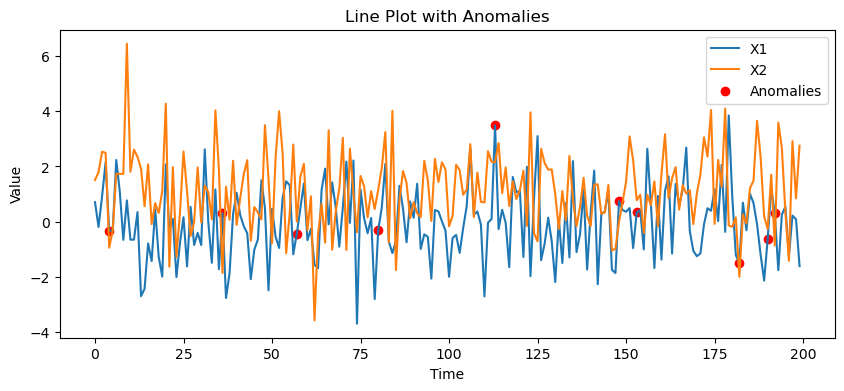

In [ ]:
# Scatter plot of anomalies
plt.figure(figsize=(6, 6))
plt.scatter(x1, x2)
plt.scatter(anomalous_data[:, 0], anomalous_data[:, 1], color='red', label='Anomalies')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot with Anomalies')
plt.legend()
plt.show()

# Line plot of anomalies
plt.figure(figsize=(10, 4))
plt.plot(x1, label='X1')
plt.plot(x2, label='X2')
plt.scatter(outlier_indices, x1[outlier_indices], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Line Plot with Anomalies')
plt.legend()
plt.show()

